# Preparación
Se monta el sistema de archivos de google drive.


In [45]:
import tensorflow as tf
tf.test.gpu_device_name()

2022-01-07 12:44:17.322289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 12:44:17.323004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 12:44:17.323472: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 12:44:17.324318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 12:44:17.324872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

'/device:GPU:0'

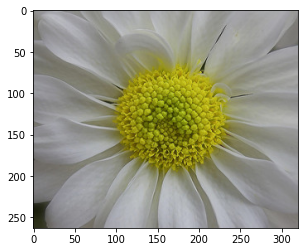

In [46]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('../input/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg', 'r')
imshow(np.asarray(pil_im))



# Carga del dataset

In [47]:
image_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/flowers-recognition/flowers",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/flowers-recognition/flowers",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


# Modelo

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten, BatchNormalization

In [49]:
model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(150, 150, 3)))


model.add(Conv2D(64, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))


model.add(Conv2D(128, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model.add(Conv2D(256, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model.add(Conv2D(512, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model.add(Conv2D(512, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(5, activation='relu'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),
              metrics=['accuracy'])

# Visualización del modelo

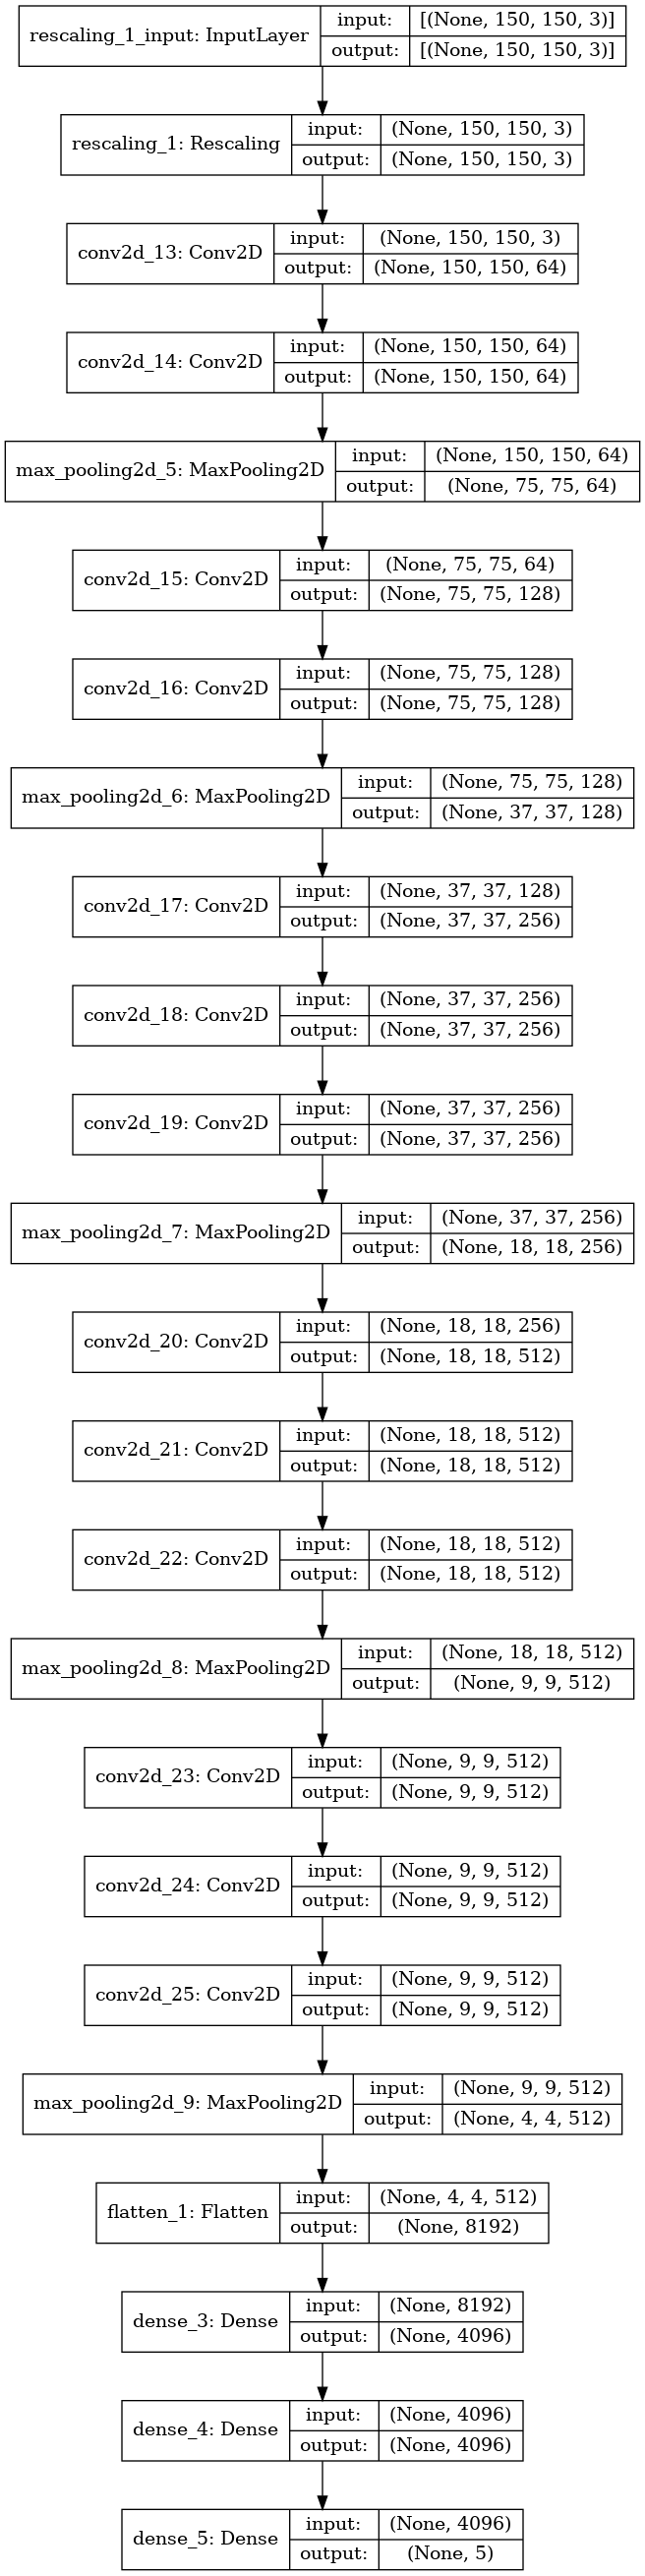

In [50]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True,
           show_layer_names=True)

# Entrenamiento

In [51]:
from keras.callbacks import EarlyStopping

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15,
                   restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
108/108 [==============================] - 15s 127ms/step - loss: 4.9101 - accuracy: 0.2279 - val_loss: 5.3741 - val_accuracy: 0.2213
Epoch 2/200
108/108 [==============================] - 14s 126ms/step - loss: 4.8659 - accuracy: 0.2296 - val_loss: 5.3694 - val_accuracy: 0.2213
Epoch 3/200
108/108 [==============================] - 14s 128ms/step - loss: 4.8560 - accuracy: 0.2305 - val_loss: 5.3523 - val_accuracy: 0.2213
Epoch 4/200
108/108 [==============================] - 14s 126ms/step - loss: 4.0174 - accuracy: 0.2675 - val_loss: 1.6436 - val_accuracy: 0.1738
Epoch 5/200
108/108 [==============================] - 14s 126ms/step - loss: 1.5066 - accuracy: 0.3254 - val_loss: 1.4862 - val_accuracy: 0.3117
Epoch 6/200
108/108 [==============================] - 14s 127ms/step - loss: 1.4874 - accuracy: 0.3379 - val_loss: 1.4960 - val_accuracy: 0.3302
Epoch 7/200
108/108 [==============================] - 14s 125ms/step - loss: 1.3982 - accuracy: 0.4354 - val_loss: 1.4400 -

# Gráfica de evolución de pérdida y exactitud durante el entrenamiento

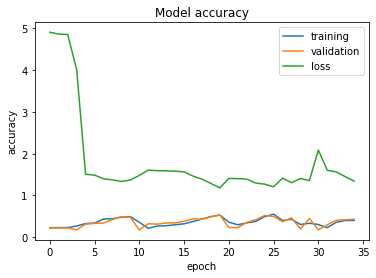

In [52]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

# Evaluación de los resultados

              precision    recall  f1-score   support

           0     0.5255    0.4045    0.4571       178
           1     0.5812    0.5913    0.5862       230
           2     0.0993    0.5556    0.1685        27
           3     0.6933    0.6118    0.6500       170
           4     0.6806    0.5039    0.5791       258

    accuracy                         0.5295       863
   macro avg     0.5160    0.5334    0.4882       863
weighted avg     0.6065    0.5295    0.5570       863



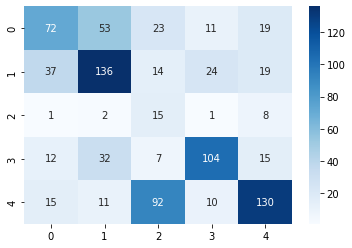

In [53]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

In [54]:
img = keras.preprocessing.image.load_img(
    '../input/flowers-recognition/flowers/daisy/10172636503_21bededa75_n.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(np.argmax(predictions[0]))

1
